In [43]:
# Import dependencies
import datetime
import pandas
import numpy 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt

In [213]:
# import data
def get_data(tickers, start, end):
    stockData = pdr.get_data_yahoo(tickers, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

tickerList = ['AAPL', 'NVDA', 'AMD', 'AMZN', 'INTC']
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=300)

meanReturns, covMatrix = get_data(tickerList, startDate, endDate)

print(meanReturns)
print(covMatrix)

[*********************100%%**********************]  5 of 5 completed

Ticker
AAPL    0.000973
AMD     0.002228
AMZN    0.001635
INTC   -0.000157
NVDA    0.005382
dtype: float64
Ticker      AAPL       AMD      AMZN      INTC      NVDA
Ticker                                                  
AAPL    0.000199  0.000120  0.000083  0.000087  0.000100
AMD     0.000120  0.000855  0.000230  0.000289  0.000485
AMZN    0.000083  0.000230  0.000285  0.000106  0.000234
INTC    0.000087  0.000289  0.000106  0.000583  0.000114
NVDA    0.000100  0.000485  0.000234  0.000114  0.000782


[0.12 0.33 0.23 0.03 0.29] 1.0


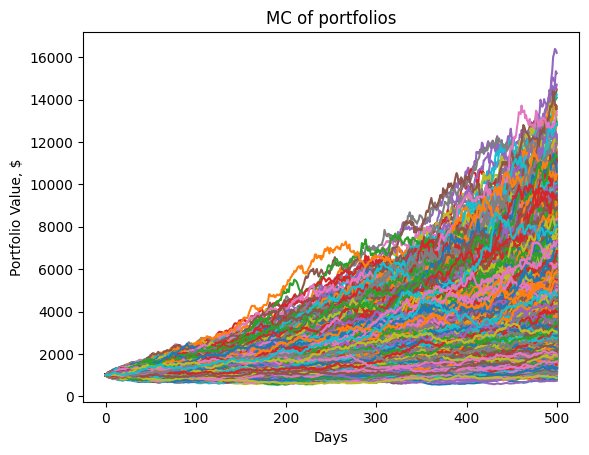

In [310]:
weights = numpy.random.random(len(meanReturns))
weights /= numpy.sum(weights)
print(weights, numpy.sum(weights))

# MC
mc_simulations = 10000 # number of simulations
timehorizon = 500 # timehorizon in days
initial_portfolio = 1000 # portfolio value at t0

drifts = numpy.full(fill_value=meanReturns, shape=(timehorizon, len(weights)))
drifts = drifts.T

portfolio_simulations = numpy.full(shape=(timehorizon + 1, mc_simulations), fill_value=0.00)

decomposition_m = numpy.linalg.cholesky(covMatrix) # Cholesky matrix decomposition

for p in range(0, mc_simulations):
    path = numpy.random.normal(size=(timehorizon, len(weights)))# random paths (normally distributed)
    returns = drifts + numpy.inner(decomposition_m, path) # drifts + correlated returns 
    portfolio_simulations[:,p] = numpy.append(1,numpy.cumprod(numpy.inner(weights, returns.T)+1)) * initial_portfolio
    
plt.plot(portfolio_simulations)
plt.ylabel('Portfolio Value, $')
plt.xlabel('Days')
plt.title('MC of portfolios')
plt.show()

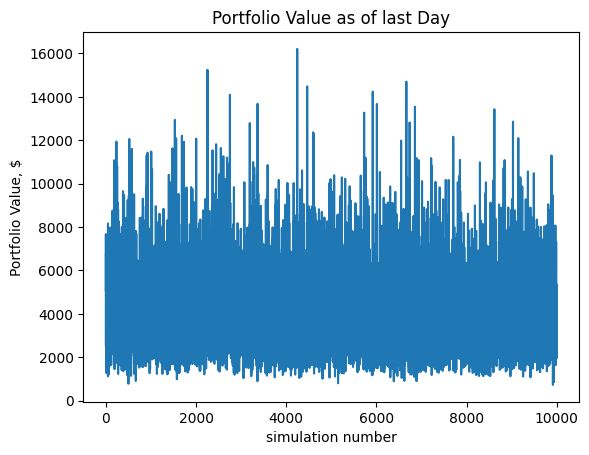

VaR-95 = $804.43
CVaR-95 = $529.62


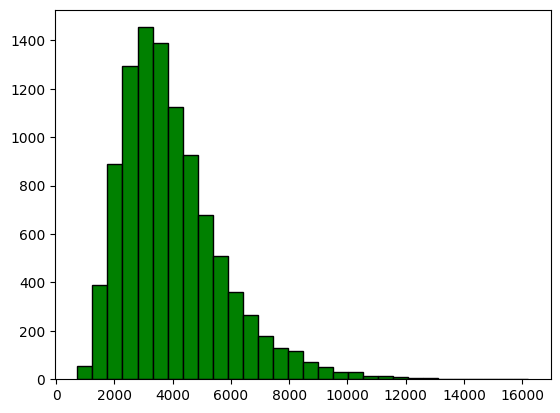

In [311]:
final_results = portfolio_simulations[-1,:]
plt.plot(final_results)
plt.ylabel('Portfolio Value, $')
plt.xlabel('simulation number')
plt.title('Portfolio Value as of last Day')
plt.show()

c_level = 5 # %
VaR = numpy.percentile(final_results, c_level) - initial_portfolio
below = final_results <= initial_portfolio + VaR
CVaR = final_results[below].mean() - initial_portfolio

print('VaR-' + str(100-c_level) + ' = ${}'.format(round(VaR,2)))
print('CVaR-' + str(100-c_level) + ' = ${}'.format(round(CVaR,2)))

plt.hist(final_results, bins=30, edgecolor='black', color='green')
plt.show()